נעשה שימוש בעזרה ע"י CHATGPT

## LIBRARIES

In [ ]:
#Import the libraries
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import LabelEncoder, StandardScaler



## DATASET

In [ ]:
#Load the dataset
dataframe_table = pd.read_csv("Healthcare-Diabetes.csv")

In [ ]:
dataframe_table.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
dataframe_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


In [ ]:
#Data preprocessing
X = dataframe_table.drop('Outcome', axis=1)
y = dataframe_table['Outcome']

## CHART

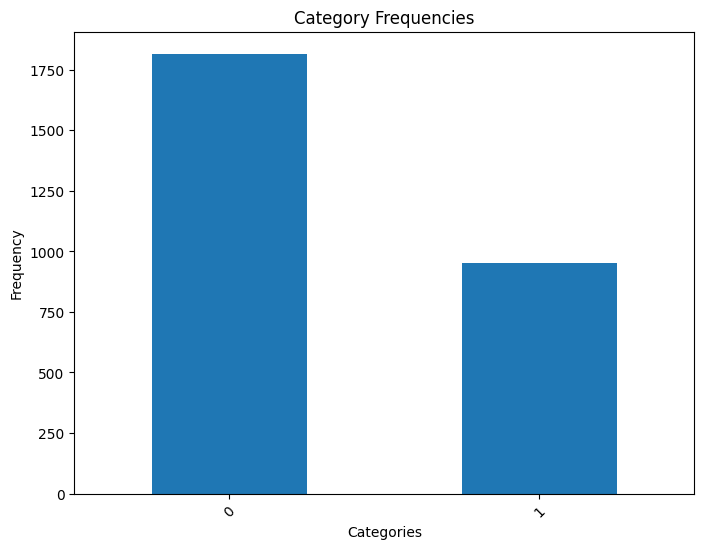

Category Counts:
0    1816
1     952
Name: Outcome, dtype: int64


In [ ]:
# Calculate the count of each category
category_counts = y.value_counts()

# Plot a bar chart
plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('Category Frequencies')
plt.xticks(rotation=45)
plt.show()

# Print the count of each category
print("Category Counts:")
print(category_counts)



---



---


**מדוע נחוץ לאזן משתנה תיוג שאינו מאוזן?**

קיום תג משתנה מאוזן שאינו מאוזן יכול להוביל לבעיות מכיוון שהוא צריך לתאר במדויק את המשתנה שאליו הוא מחובר. כאשר זה לא מאוזן, זה יכול לגרום לבלבול ושגיאות בעבודה שלנו, בין אם זה קידוד או ניתוח נתונים. לכן, תג מאוזן חיוני לבהירות ולתוצאות אמינות.

 **הסבירו את ההגיון מאחורי השיטות, כיצד האלגוריתמים עובדים ומהו התוצר? מהם היתרונות והחסרונות של דגימת יתר וחסר?**

שיטות דגימה כוללות בחירת תת-קבוצת נתונים מתוך מערך נתונים גדול יותר כדי להפוך את הניתוח לניתן יותר לניהול. אלגוריתמים כמו דגימה אקראית או דגימה מרובדת מנחים תהליך זה, ומבטיחים דגימות מייצגות. המוצר הוא מערך נתונים קטן יותר לניתוח. דגימה מוגזמת עלולה להיות יקרה וגוזלת זמן, בעוד שדגימה לא מספקת עלולה להוביל למסקנות לא מדויקות.

---



---



## MISSING VALUES

In [ ]:
#Check missing values
missing_values = dataframe_table.isnull().sum()
missing_values


Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# If no missing values are found, insert missing values into the DataFrame
if missing_values.sum() == 0:
    column_name = 'Outcome'
    num_missing_values = 5

    # Randomly select row indices to insert missing values
    random_indices = np.random.choice(len(dataframe_table), num_missing_values, replace=False)

    # Insert missing values at selected indices
    dataframe_table.loc[random_indices, column_name] = np.nan

    # Display a message indicating missing values were inserted
    print(f"Inserted {num_missing_values} missing values into column '{column_name}'")
else:
    # Print information about existing missing values
    print("Missing values already exist in the dataset:")
    print(missing_values)

Inserted 5 missing values into column 'Outcome'


## FILL THE MISSING VALUES

In [ ]:
#Fill missing values using mean imputation
data_mean_imputed = dataframe_table.copy()
data_mean_imputed.fillna(data_mean_imputed.mean(), inplace=True)

#Fill missing values using median imputation
data_median_imputed = dataframe_table.copy()
data_median_imputed.fillna(data_median_imputed.median(), inplace=True)

#Fill missing values using forward fill
data_forward_filled = dataframe_table.copy()
data_forward_filled.fillna(method='ffill', inplace=True)

## STANDARDIZE

In [ ]:
# Create StandardScaler instances
scaler_mean = StandardScaler()
scaler_median = StandardScaler()
scaler_forward_filled = StandardScaler()

# Fit and transform the scalers on the respective datasets
X_scaled_mean = scaler_mean.fit_transform(data_mean_imputed.drop('Outcome', axis=1))
X_scaled_median = scaler_median.fit_transform(data_median_imputed.drop('Outcome', axis=1))
X_scaled_forward_filled = scaler_forward_filled.fit_transform(data_forward_filled.drop('Outcome', axis=1))

## SPLIT DATASET INTO TRAIN AND TEST SETS

In [ ]:
# Define the features (X) and target (y) for each dataset
X_mean_imputed = data_mean_imputed.drop('Outcome', axis=1)
y_mean_imputed = data_mean_imputed['Outcome']

X_median_imputed = data_median_imputed.drop('Outcome', axis=1)
y_median_imputed = data_median_imputed['Outcome']

X_forward_filled = data_forward_filled.drop('Outcome', axis=1)
y_forward_filled = data_forward_filled['Outcome']

# Split each dataset into train and test sets
X_train_mean, X_test_mean, y_train_mean, y_test_mean = train_test_split(
    X_mean_imputed, y_mean_imputed, test_size=0.2, random_state=42
)

X_train_median, X_test_median, y_train_median, y_test_median = train_test_split(
    X_median_imputed, y_median_imputed, test_size=0.2, random_state=42
)

X_train_forward_filled, X_test_forward_filled, y_train_forward_filled, y_test_forward_filled = train_test_split(
    X_forward_filled, y_forward_filled, test_size=0.2, random_state=42
)
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## MODEL BUILDING

In [ ]:
# Use the filterwarnings method to ignore all warnings
warnings.filterwarnings("ignore")
# Define the models
logistic_regression_model = LogisticRegression()
svm_model = SVC()
random_forest_model = RandomForestClassifier()

# List of models
models = [
    ("Logistic Regression", logistic_regression_model),
    ("Support Vector Machine", svm_model),
    ("Random Forest", random_forest_model)
]

# Iterate over the models and train/evaluate each one
for model_name, model in models:
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Evaluate the model's performance
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Print the evaluation metrics for each model
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print("\n")

# Cross_val_predict for Logistic Regression
y_pred_cv = cross_val_predict(logistic_regression_model, X_train, y_train, cv=5)
f1_cv = f1_score(y_train, y_pred_cv, average='weighted')
print(f"Cross-Validated F1 Score (Logistic Regression): {f1_cv:.2f}")


Model: Logistic Regression
Accuracy: 0.68
Precision: 0.66
Recall: 0.68
F1 Score: 0.66


Model: Support Vector Machine
Accuracy: 0.66
Precision: 0.44
Recall: 0.66
F1 Score: 0.53


Model: Random Forest
Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1 Score: 0.98


Cross-Validated F1 Score (Logistic Regression): 0.68


## HYPERPARAMETER

In [ ]:
# Define the hyperparameter grid for Logistic Regression
param_grid = {
    'logistic__C': [0.1, 1.0, 10.0],
    'logistic__solver': ['liblinear', 'lbfgs']
}

# Create a pipeline
logistic_regression_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic', LogisticRegression())
])

# Use GridSearchCV to search for the best hyperparameters
grid_search = GridSearchCV(logistic_regression_pipeline, param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)

# Fit the model using your training data
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Hyperparameters for Logistic Regression:")
print(grid_search.best_params_)

# Evaluate the model's performance
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Best Hyperparameters for Logistic Regression:
{'logistic__C': 1.0, 'logistic__solver': 'liblinear'}
Accuracy: 0.77
Precision: 0.77
Recall: 0.77
F1 Score: 0.76


In [ ]:
# Models
logistic_regression_model = LogisticRegression()
svm_model = SVC()
random_forest_model = RandomForestClassifier()

# List of models
models = [
    logistic_regression_model,
    svm_model,
    random_forest_model
]

# List of model names
model_names = [
    "Logistic Regression",
    "Support Vector Machine",
    "Random Forest"
]

# Loop through models
for model, model_name in zip(models, model_names):
    # Initialize a pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])

    # Fit the model on the training set
    pipeline.fit(X_train, y_train)

    # Make predictions on both training and test sets
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)

    # Print classification reports
    print("Classification Report for Training Set:")
    print(f"Model: {model_name}")
    print(classification_report(y_train, y_train_pred))

    print("Classification Report for Test Set:")
    print(f"Model: {model_name}")
    print(classification_report(y_test, y_test_pred))


Classification Report for Training Set:
Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.80      0.89      0.84      1449
           1       0.74      0.58      0.65       765

    accuracy                           0.78      2214
   macro avg       0.77      0.74      0.75      2214
weighted avg       0.78      0.78      0.78      2214

Classification Report for Test Set:
Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       367
           1       0.73      0.52      0.61       187

    accuracy                           0.77       554
   macro avg       0.76      0.71      0.72       554
weighted avg       0.77      0.77      0.76       554

Classification Report for Training Set:
Model: Support Vector Machine
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      1449
           1       0.84      0.70    



---



---


**הסבירו את התוצאות שהתקבלו ביחס לשני מדדים נוספים שאינם ACCURACY באופן מילולי. האם התוצאה טובה? מה משמעות כל אחד מהמדדים?**

# Logistic Regression:

רגרסיה לוגיסטית יעילה מבחינה חישובית ובדרך כלל מהירה לאימון ולניבוי. הוא מתאים היטב למערכי נתונים גדולים בשל הפשטות שלו.
יש לו שימוש נמוך בזיכרון בהשוואה למודלים מורכבים יותר כמו רשתות עצביות עמוקות.

---


# Support Vector Machine (SVM):

SVSVMs יכולים להיות אינטנסיביים מבחינה חישובית, במיוחד עם מערכי נתונים גדולים. זמן האימון יכול לגדול באופן משמעותי עם נתונים במידות גבוהות.
ייתכן שמערכות SVM אינן הבחירה היעילה ביותר כאשר משאבי החישוב מוגבלים.

---


# Random Forest:

יערות אקראיים יכולים להיות יעילים לאימון ולניבוי. הם ניתנים להקביל, מה שאומר שהם יכולים לנצל את היתרונות של מעבדים מרובי ליבות.
השימוש בזיכרון יכול להיות גבוה יותר מרגרסיה לוגיסטית אך בדרך כלל ניתן לניהול.



---


אנו עובדים עם מערך נתונים גדול וזקוקים ליעילות חישובית מירבית,
רגרסיה לוגיסטית היא האפשרות המועדפת. אם ביצועים חזויים הם
עדיפות עליונה ומשאבים חישוביים מספיקים, אולי כדאי לשקול יערות אקראיים או SVMs, מכיוון שהם יכולים לספק דיוק גבוה יותר במחיר מוגבר של זמן חישוב ושימוש בזיכרון.


---


